In [18]:
import numpy as np 
import pandas as pd 

#Visualisation Library
import matplotlib.pyplot as plt
import seaborn as sns

#To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# About the dataset

We will be creating a prediction model that not only helps the applicant to find out if they are eligible for the loan , but also helps the bank by minimizing the risk and reducing the number of defaulters.

We have been provided with below applicant information based on which prediction is to be made whether the applicant's loan request can be approved or not

1. Loan ID
2. Gender- Male or Female
3. Married - Whether the applicant is married or unmarried
4. Dependents - How many dependents does applicant have
5. Education- whether the applicant is graduate or non graduate
6. Self Employed - whether he is self employed or not
7. Applicant income 
8. CoApplicant income 
9. Loan Amount - 
10. Loan Amount term
11. Credit History
12. Property Area
13. Loan status

**Task : Predict whether an appplicants loan request can be approved or not** 

In [20]:
#changing the working directory
%cd  C:\Users\pooja\Downloads\Loan Prediction

C:\Users\pooja\Downloads\Loan Prediction


# Loading the dataset

In [155]:
dftrain=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
dftest=pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
dftrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Loading packages

In [156]:

#Classification model 
from sklearn.linear_model import LogisticRegression

#Classification model evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#To split the model into training and testing data
from sklearn.model_selection import train_test_split

#Different model improvement packages
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [157]:
dftrain.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [158]:
#Checking the data types of our data
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


* All the object data types needs to be converted into int so we can build a model 
* Dependents has to be int which has to be looked into

In [159]:
#Checking the number of rows and columns in our dataset
dftrain.shape, dftest.shape

((614, 13), (367, 12))

In [160]:
#Checking the bal of target variable
dftrain["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

* There isnt a good bal between our target which needs to be managed using ROS method or stratify

# Visualising Categorical variables

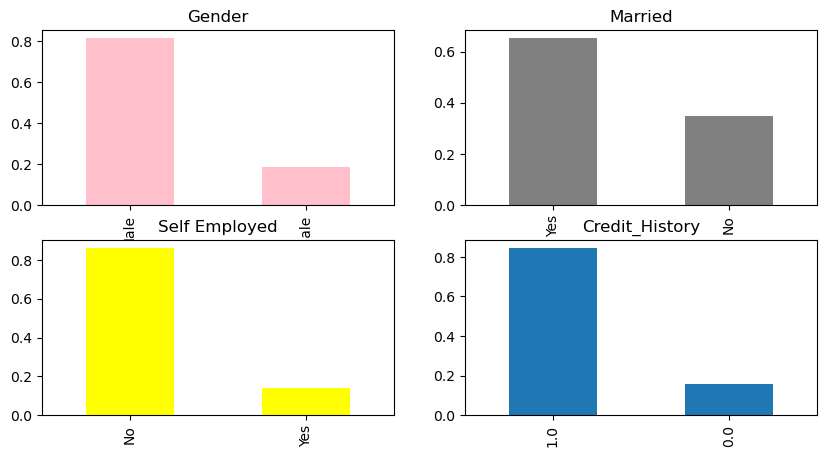

In [161]:
plt.figure(1) 
plt.subplot(2,2,1)
dftrain['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Gender',color='pink')
plt.subplot(2,2,2)
dftrain['Married'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Married',color='grey')
plt.subplot(2,2,3)
dftrain['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Self Employed',color='yellow')
plt.subplot(2,2,4)
dftrain['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Credit_History')
plt.show()

Most loan Applicants are male, married and not self_employed with a 1.0 credit history

# Visualising Ordinal Variable

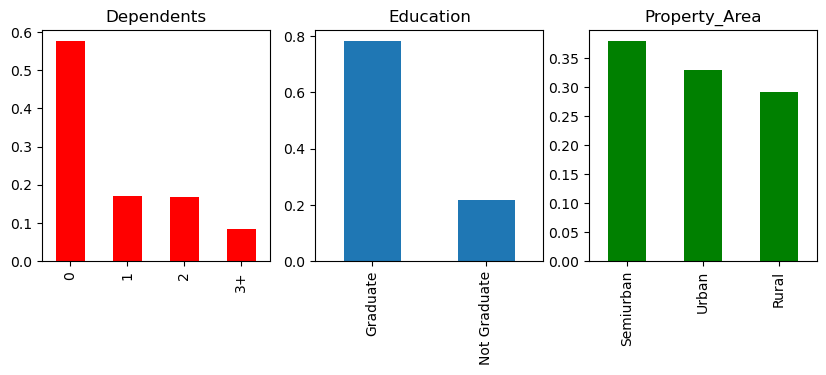

In [162]:
plt.figure(1)
plt.subplot(1,3,1)
dftrain['Dependents'].value_counts(normalize=True).plot.bar(figsize=(10,3),title='Dependents',color='red')
plt.subplot(1,3,2)
dftrain['Education'].value_counts(normalize=True).plot.bar(figsize=(10,3),title='Education')
plt.subplot(1,3,3)
dftrain['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(10,3),title='Property_Area',color='green')
plt.show()

Most applicants dont have dependents are graduates and belong from semiurban area

In [163]:
dftrain['Dependents']=dftrain['Dependents'].replace('3+','3')

# Visualising Numeric Variables and checking for outliers

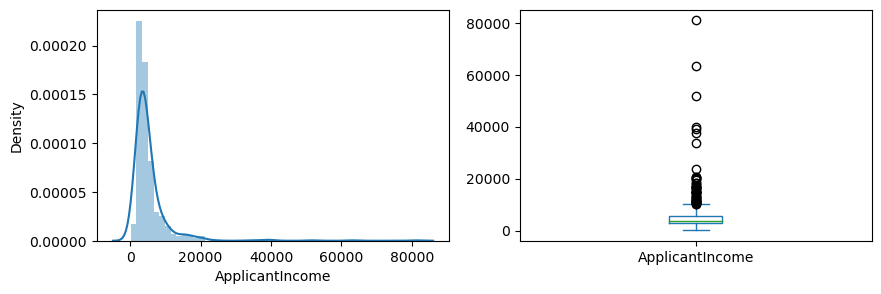

In [164]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(dftrain['ApplicantIncome'])
plt.subplot(1,2,2)
dftrain['ApplicantIncome'].plot.box(figsize=(10,3))
plt.show()

We can observe that there is high left skewness in the applicant income which means there are outliers which needs to be treated before we build our model

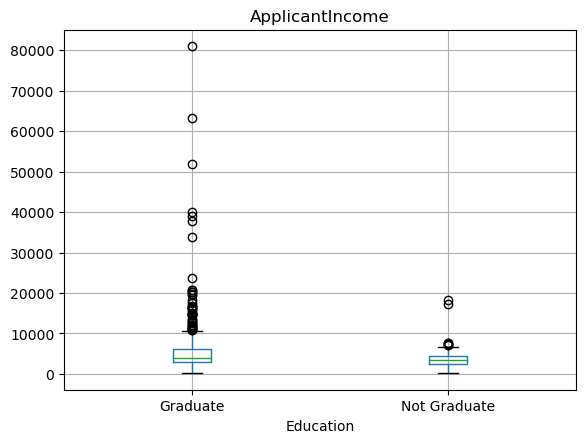

In [165]:
#Visualizing the application income considering whether applicant is graduate or not
dftrain.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")
plt.show()

We can observe that most anomalies are in case of Graduates compared to non graduates

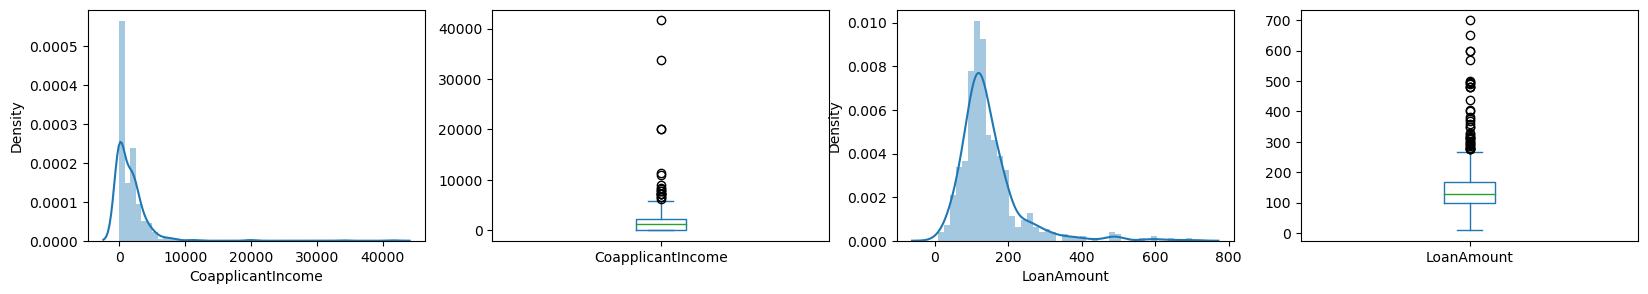

In [166]:
plt.figure(1)
plt.subplot(1,4,1)
sns.distplot(dftrain['CoapplicantIncome'])
plt.subplot(1,4,2)
dftrain['CoapplicantIncome'].plot.box(figsize=(20,3))
plt.subplot(1,4,3)
sns.distplot(dftrain['LoanAmount'])
plt.subplot(1,4,4)
dftrain['LoanAmount'].plot.box()
plt.show()

Theres high skewnesss for coapplicant income and light skewness in case of loan amount

# Correlation of dataset

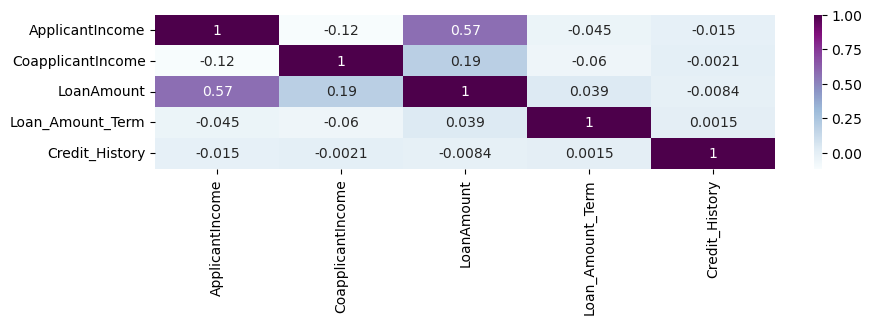

In [167]:
plt.figure(figsize=(10,2))
sns.heatmap(dftrain.corr(),cmap='BuPu',annot=True)
plt.show()

# Missing Value Imputation

In [168]:
dftrain.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [169]:
#Creating variables that stores all numeric and object columns
numeric_col= dftrain.select_dtypes([int,float]).columns
object_col= dftrain.select_dtypes([object]).columns
print('object columns: ', object_col)
print('numeric columns:' , numeric_col)

object columns:  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
numeric columns: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [170]:
#Inputing the missing numeric data with mean value
for i in dftrain[numeric_col]:
    print(i,':' ,round(dftrain[i].mean(),2))
    dftrain[i].fillna(round(dftrain[i].mean(),2),inplace=True)

ApplicantIncome : 5403.46
CoapplicantIncome : 1621.25
LoanAmount : 146.41
Loan_Amount_Term : 342.0
Credit_History : 0.84


In [171]:
dftrain.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

All the numeric missing values have been imputed 

In [172]:
#Imputing object data with mode
for i in dftrain[object_col]:
    print(i,':', dftrain[i].mode()[0])
    dftrain[i].fillna(dftrain[i].mode()[0],inplace=True)

Loan_ID : LP001002
Gender : Male
Married : Yes
Dependents : 0
Education : Graduate
Self_Employed : No
Property_Area : Semiurban
Loan_Status : Y


In [173]:
dftrain.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

NO more missing values 

# Understanding the uniqueness of our data

In [174]:
#Checking the uniquness of our data
dftrain.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

# Treating object data types for model building

In [175]:
#Chekcing the remaining columns to treat the object data types
dftrain.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [176]:
#Converting dependents into int as it includes integer values
dftrain['Dependents']=dftrain['Dependents'].astype('int')

In [177]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [178]:
for col in ['Married', 'Education', 'Self_Employed', 'Loan_Status']:
    dftrain[col] = lb.fit_transform(dftrain[col])

In [179]:
dftrain

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0,0,0,0,5849,0.0,146.41,360.0,1.0,Urban,1
1,LP001003,Male,1,1,0,0,4583,1508.0,128.00,360.0,1.0,Rural,0
2,LP001005,Male,1,0,0,1,3000,0.0,66.00,360.0,1.0,Urban,1
3,LP001006,Male,1,0,1,0,2583,2358.0,120.00,360.0,1.0,Urban,1
4,LP001008,Male,0,0,0,0,6000,0.0,141.00,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,0,0,0,2900,0.0,71.00,360.0,1.0,Rural,1
610,LP002979,Male,1,3,0,0,4106,0.0,40.00,180.0,1.0,Rural,1
611,LP002983,Male,1,1,0,0,8072,240.0,253.00,360.0,1.0,Urban,1
612,LP002984,Male,1,2,0,0,7583,0.0,187.00,360.0,1.0,Urban,1


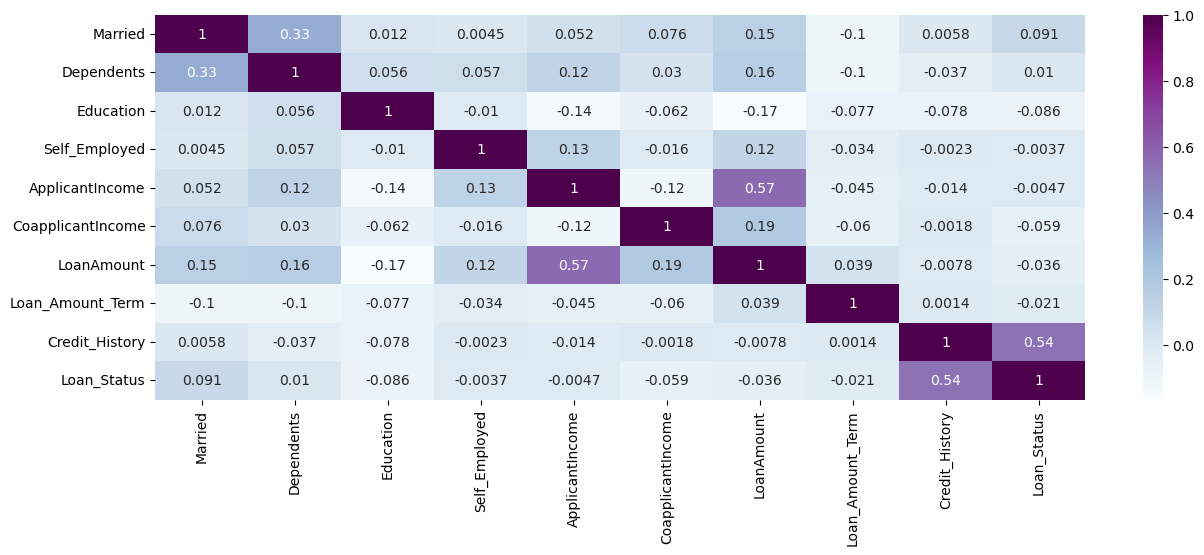

In [180]:
#Checking for correlation
plt.figure(figsize=(15,5))
sns.heatmap(dftrain.corr(),cmap='BuPu',annot=True)
plt.show()

* Loan status is highly correlated to Credit history
* we can see some multicoreniality - for eg- applicant income is highly correlated to loan amount

# Dropping redundant columns

In [181]:
dftrain.drop('Loan_ID',axis=1, inplace=True)

In [182]:
#Using get dummies for the remaining object columns for which mapping or encoder cant be used 
dftrain=pd.get_dummies(dftrain)
dftrain.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,0,5849,0.0,146.41,360.0,1.0,1,0,1,0,0,1
1,1,1,0,0,4583,1508.0,128.00,360.0,1.0,0,0,1,1,0,0
2,1,0,0,1,3000,0.0,66.00,360.0,1.0,1,0,1,0,0,1
3,1,0,1,0,2583,2358.0,120.00,360.0,1.0,1,0,1,0,0,1
4,0,0,0,0,6000,0.0,141.00,360.0,1.0,1,0,1,0,0,1


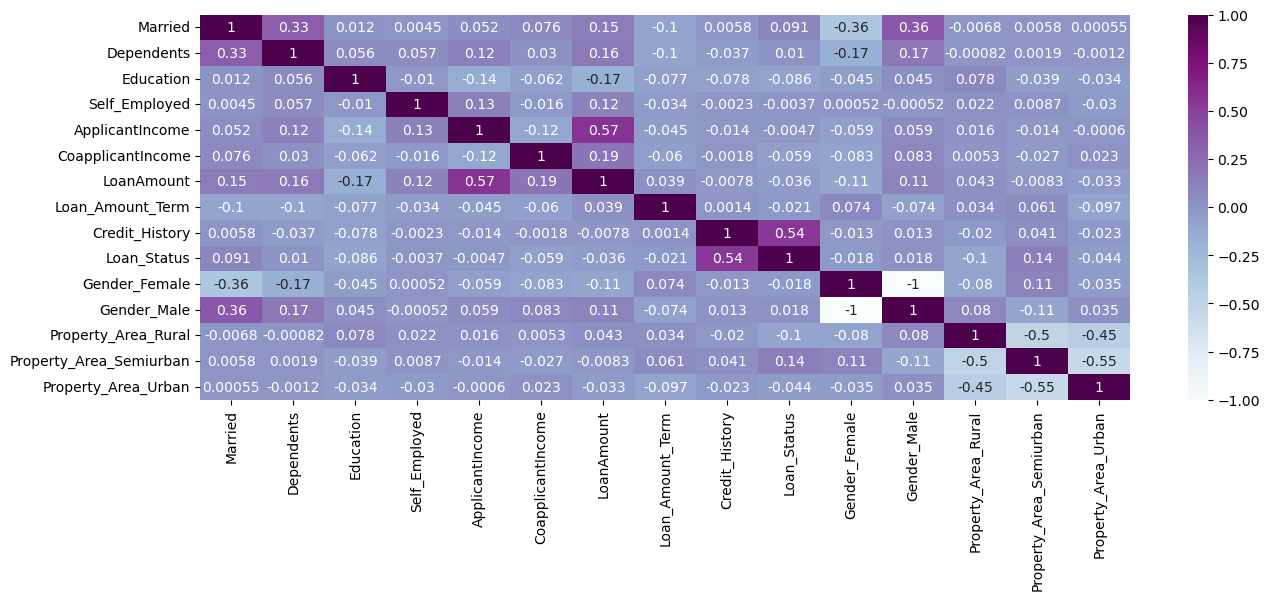

In [183]:
#Checking for correlation again now that we have treated the object columns
plt.figure(figsize=(15,5))
sns.heatmap(dftrain.corr(),cmap='BuPu',annot=True)
plt.show()

In [184]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  614 non-null    int32  
 1   Dependents               614 non-null    int32  
 2   Education                614 non-null    int32  
 3   Self_Employed            614 non-null    int32  
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    float64
 8   Credit_History           614 non-null    float64
 9   Loan_Status              614 non-null    int32  
 10  Gender_Female            614 non-null    uint8  
 11  Gender_Male              614 non-null    uint8  
 12  Property_Area_Rural      614 non-null    uint8  
 13  Property_Area_Semiurban  614 non-null    uint8  
 14  Property_Area_Urban      6

Finally all the object columns are treated and there are no null values in our data so we can start working on model building

# Model building

In [185]:
#Spliting the dataset into features and target
x=dftrain.drop('Loan_Status',axis=1)
y=dftrain['Loan_Status']

In [186]:
#Further splitting the dataset into training and testing data
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.25,stratify=y)

In [187]:
#Using logistic regression supervised ML classification model
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [188]:
ypred=lr.predict(xtest)
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

0.7857142857142857
[[ 19  29]
 [  4 102]]
              precision    recall  f1-score   support

           0       0.83      0.40      0.54        48
           1       0.78      0.96      0.86       106

    accuracy                           0.79       154
   macro avg       0.80      0.68      0.70       154
weighted avg       0.79      0.79      0.76       154



# Stratified K-Folds

In [189]:
kf=StratifiedKFold(n_splits=5, random_state=1, shuffle= True)
i=1
for train_index,test_index in kf.split(x,y):
    global model
    print('{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=x.iloc[train_index],x.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]    
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy score: ', score)
    i+=1
    pred_test =model.predict(xtest)
    pred= model.predict_proba(xvl)[:,1]
    
   

1 of kfold 5
Accuracy score:  0.8048780487804879
2 of kfold 5
Accuracy score:  0.8211382113821138
3 of kfold 5
Accuracy score:  0.7967479674796748
4 of kfold 5
Accuracy score:  0.8211382113821138
5 of kfold 5
Accuracy score:  0.7950819672131147


# ROC-AUC Curve 

In [190]:
from sklearn import metrics

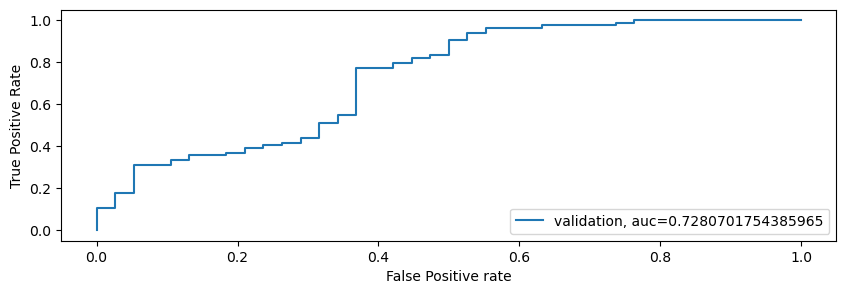

In [191]:
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(10,3))
plt.plot(fpr,tpr,label='validation, auc='+str(auc))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')   
plt.legend(loc=4)
plt.show()

# Submission

In [192]:
loan_id=dftest[['Loan_ID']]
loan_id.head()

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051


In [193]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [194]:
dftest['Gender'].fillna(dftest['Gender'].mode()[0],inplace=True)
dftest['Dependents'].fillna(dftest['Dependents'].mode()[0],inplace=True)
dftest['Self_Employed'].fillna(dftest['Self_Employed'].mode()[0],inplace=True)
dftest['LoanAmount'].fillna(dftest['LoanAmount'].mean(),inplace=True)
dftest['Loan_Amount_Term'].fillna(dftest['Loan_Amount_Term'].mean(),inplace=True)
dftest['Credit_History'].fillna(dftest['Credit_History'].mean(),inplace=True)

In [195]:
dftest.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [196]:
dftest['Dependents']=dftest['Dependents'].replace('3+',3)
dftest['Dependents']=dftest['Dependents'].astype(int)

In [197]:
dftest.drop('Loan_ID',axis=1, inplace=True)
dftest['Married']=dftest['Married'].map({'Yes':1, 'No':0})
dftest['Self_Employed']=dftest['Self_Employed'].map({'Yes':1, 'No':0})
dftest['Education']=dftest['Education'].map({'Graduate':1, 'Not Graduate':0})

In [198]:
dftest=pd.get_dummies(dftest)
dftest.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,5720,0,110.0,360.0,1.000000,0,1,0,0,1
1,1,1,1,0,3076,1500,126.0,360.0,1.000000,0,1,0,0,1
2,1,2,1,0,5000,1800,208.0,360.0,1.000000,0,1,0,0,1
3,1,2,1,0,2340,2546,100.0,360.0,0.825444,0,1,0,0,1
4,0,0,0,0,3276,0,78.0,360.0,1.000000,0,1,0,0,1


In [199]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  367 non-null    int64  
 1   Dependents               367 non-null    int32  
 2   Education                367 non-null    int64  
 3   Self_Employed            367 non-null    int64  
 4   ApplicantIncome          367 non-null    int64  
 5   CoapplicantIncome        367 non-null    int64  
 6   LoanAmount               367 non-null    float64
 7   Loan_Amount_Term         367 non-null    float64
 8   Credit_History           367 non-null    float64
 9   Gender_Female            367 non-null    uint8  
 10  Gender_Male              367 non-null    uint8  
 11  Property_Area_Rural      367 non-null    uint8  
 12  Property_Area_Semiurban  367 non-null    uint8  
 13  Property_Area_Urban      367 non-null    uint8  
dtypes: float64(3), int32(1), i

In [200]:
pred_test=model.predict(dftest)

In [201]:
submission=pd.DataFrame()
submission['Loan_ID']=loan_id['Loan_ID']
submission['Loan_Status']=pred_test

In [202]:
submission['Loan_Status']=submission['Loan_Status'].map({1: 'Yes', 2: 'No'})

In [203]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Logistic_Regression.csv')

In [205]:
dftrain.columns

Index(['Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

# Feature Engineering

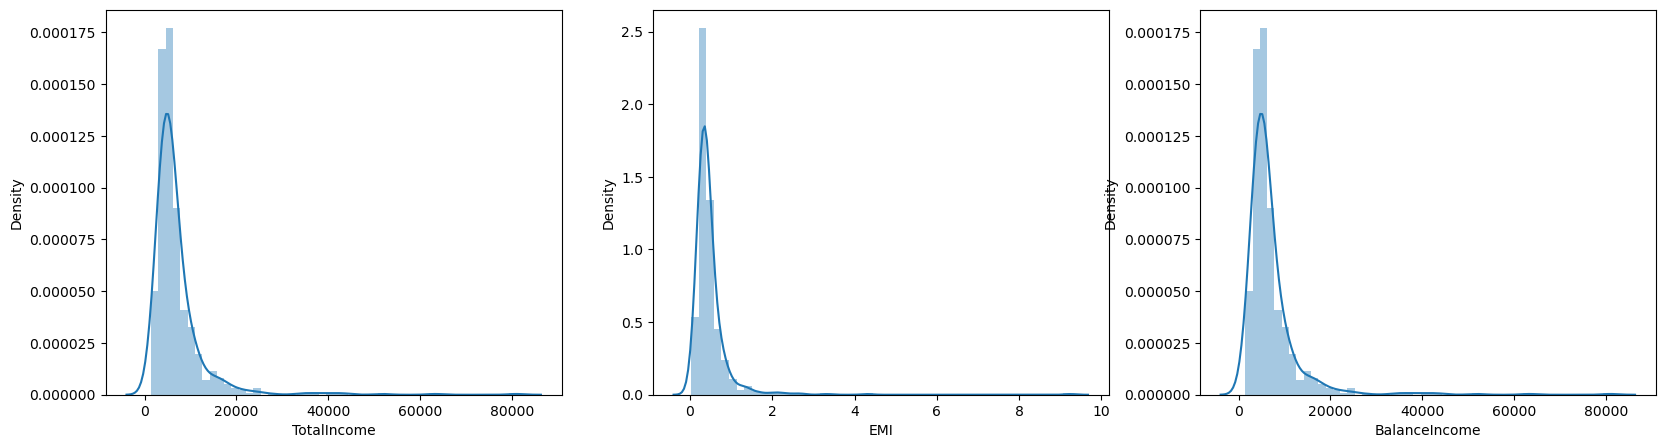

In [206]:
dftrain['TotalIncome']=dftrain['ApplicantIncome']+dftrain['CoapplicantIncome']
dftrain['EMI']=dftrain['LoanAmount']/dftrain['Loan_Amount_Term']
dftrain['BalanceIncome']=dftrain['TotalIncome']-dftrain['EMI']

plt.figure(1,figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(dftrain['TotalIncome'])
plt.subplot(1,3,2)
sns.distplot(dftrain['EMI'])
plt.subplot(1,3,3)
sns.distplot(dftrain['BalanceIncome'])
plt.show()

In [207]:
dftest['TotalIncome']=dftest['ApplicantIncome']+dftest['CoapplicantIncome']
dftest['EMI']=dftest['LoanAmount']/dftest['Loan_Amount_Term']
dftest['BalanceIncome']=dftest['TotalIncome']-dftest['EMI']

In [208]:
dftrain.drop(['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount'],axis=1,inplace=True)
dftest.drop(['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount'],axis=1,inplace=True)


# Testing multiple models

In [210]:
x=dftrain.drop('Loan_Status', axis=1)
y=dftrain['Loan_Status']

In [213]:
def model(model_name,feature,target):
    i=1
    kf=StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    for train_index,test_index in kf.split(x,y):
        print('{} of kfold {}'.format(i,kf.n_splits))
        xtr,xte= x.iloc[train_index],x.iloc[test_index]
        ytr,yte=y.iloc[train_index],y.iloc[test_index]
        
        model=model_name
        model.fit(xtr,ytr)
        pred=model.predict(xte)
        score=accuracy_score(yte,pred)
        print('Accuracy_score: ',score)
        i+=1
        pred_test=model.predict(dftest)
        pred=model.predict_proba(xte)[:,1]
    

In [214]:
model(LogisticRegression(),x,y)

1 of kfold 5
Accuracy_score:  0.8048780487804879
2 of kfold 5
Accuracy_score:  0.7642276422764228
3 of kfold 5
Accuracy_score:  0.7642276422764228
4 of kfold 5
Accuracy_score:  0.7967479674796748
5 of kfold 5
Accuracy_score:  0.7377049180327869


In [215]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=loan_id['Loan_ID']

submission['Loan_Status']=submission['Loan_Status'].map({1: 'Yes',2:'No'})
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('LogisticRegression2.csv')

In [222]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt=DecisionTreeClassifier()

In [223]:
model(dt,x,y)

1 of kfold 5
Accuracy_score:  0.6747967479674797
2 of kfold 5
Accuracy_score:  0.7317073170731707
3 of kfold 5
Accuracy_score:  0.6341463414634146
4 of kfold 5
Accuracy_score:  0.7073170731707317
5 of kfold 5
Accuracy_score:  0.6311475409836066


In [224]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=loan_id['Loan_ID']

submission['Loan_Status']=submission['Loan_Status'].map({1: 'Yes',2:'No'})
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('DecisionTreeClassifier.csv')

In [225]:
model(RandomForestClassifier(max_depth=10, random_state=2),x,y)

1 of kfold 5
Accuracy_score:  0.8373983739837398
2 of kfold 5
Accuracy_score:  0.7967479674796748
3 of kfold 5
Accuracy_score:  0.7804878048780488
4 of kfold 5
Accuracy_score:  0.8292682926829268
5 of kfold 5
Accuracy_score:  0.7704918032786885


# GridSearchCV

In [226]:
parameters={'max_depth':list(range(1,20,2)),'n_estimators': list(range(1,200,20))}
grid=GridSearchCV(RandomForestClassifier(random_state=1), parameters)

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.25)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [227]:
grid.best_params_
grid.best_score_
print(grid.best_estimator_)
model=grid.best_estimator_
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

RandomForestClassifier(max_depth=5, n_estimators=101, random_state=1)


In [228]:
rfc=RandomForestClassifier(max_depth=5,n_estimators=101 ,random_state=1)
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)

In [230]:
pred_test=rfc.predict(dftest)

In [232]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=loan_id['Loan_ID']

submission['Loan_Status']=submission['Loan_Status'].map({1: 'Yes',2:'No'})
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('RandomForestClassifier.csv')

# Feature Importance

<Axes: >

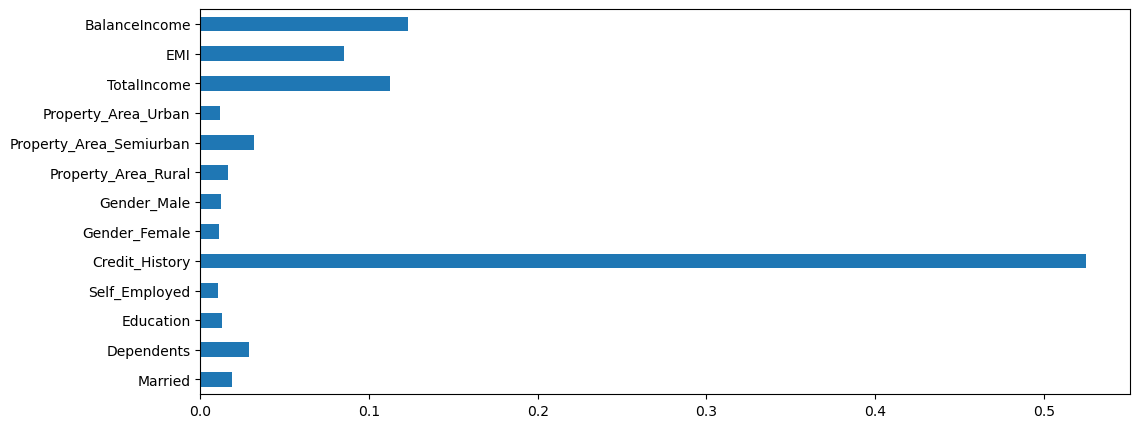

In [233]:
importances=pd.Series(rfc.feature_importances_, index=x.columns)
importances.plot(kind='barh',figsize=(12,5))

# Thankyou :)